In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
fd = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv",encoding='latin')
fd.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
fd.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
fd.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
fd.size

155090

In [7]:
fd.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [8]:
fd.shape

(15509, 10)

In [9]:
fd.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
fd.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [11]:
def missing_values_percent(fd):
    missing_values = fd.isna().sum()
    percentage_missing = (missing_values / len(fd) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values}) 

    return result_movie


result = missing_values_percent(fd)
result

,Missing Values
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [12]:
fd.dropna(subset=['Rating'], inplace=True)
(round(fd.isnull().sum()/fd.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [13]:
print('INFO:',"\n")
print(fd.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",fd.describe,"\n\n\n\n\n")
print('nunique:',"\n",fd['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",fd['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",fd.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",fd['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",fd.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",fd["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",fd.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (20

In [14]:
fd[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
50%,6.000000
75%,6.800000
80%,7.000000
90%,7.500000
95%,7.900000
98%,8.300000


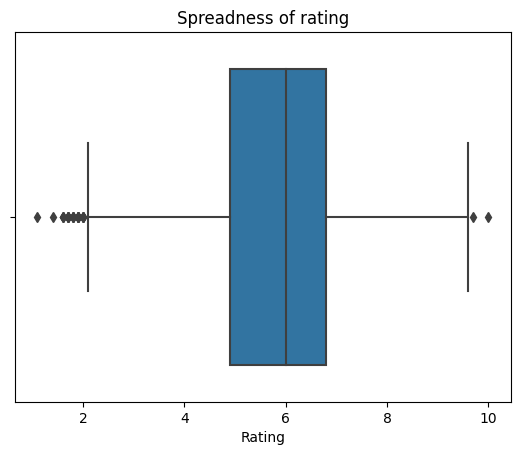

In [15]:
sns.boxplot(x=fd['Rating'])
plt.title('Spreadness of rating')
plt.show()

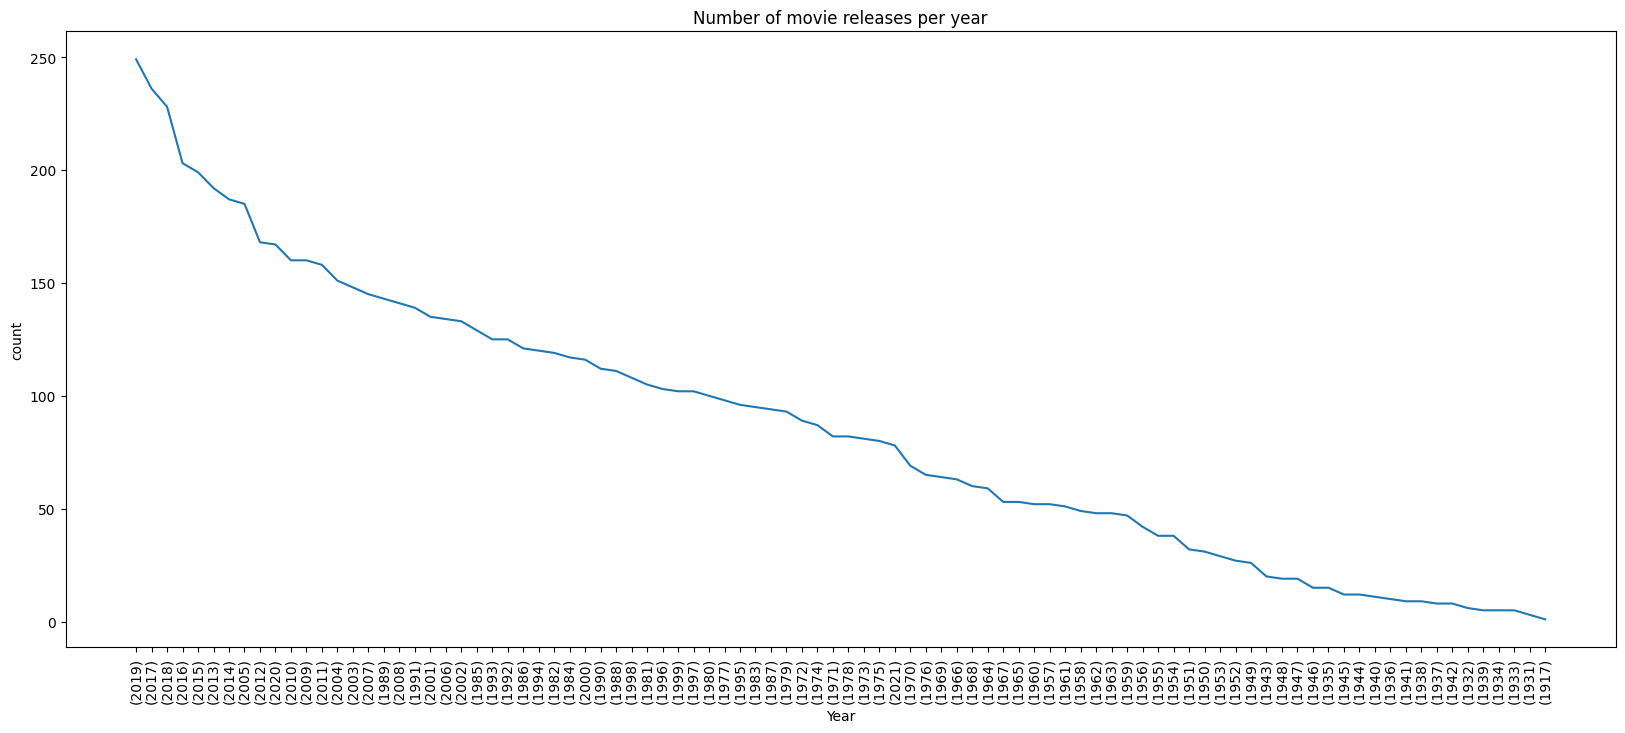

In [16]:
year_count = fd.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

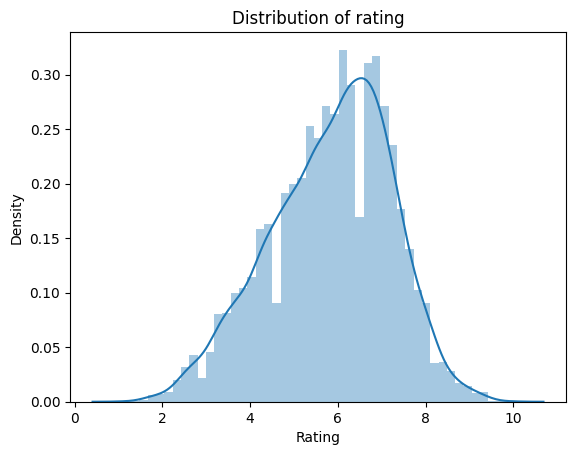

In [17]:
sns.distplot(fd['Rating'])
plt.title('Distribution of rating')
plt.show()

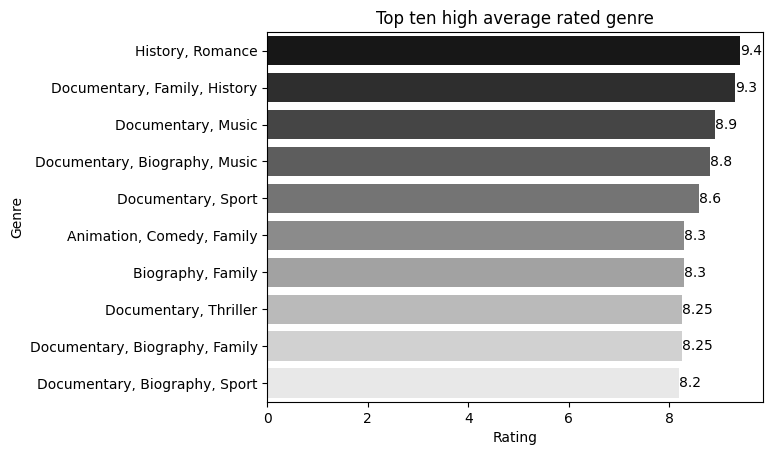

In [18]:
genre_rate = fd.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()


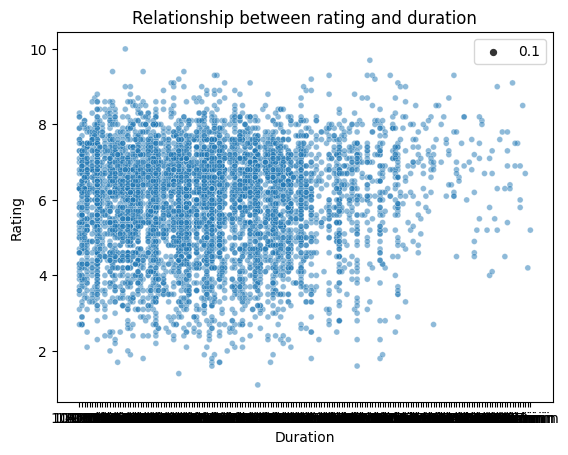

In [19]:
sns.scatterplot(data=fd, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

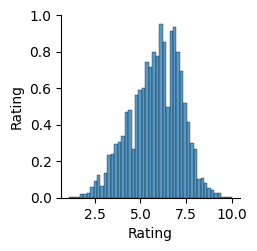

In [20]:
sns.pairplot(fd[['Votes', 'Rating', 'Duration']]);

In [21]:
fd['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       nan, 'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Come

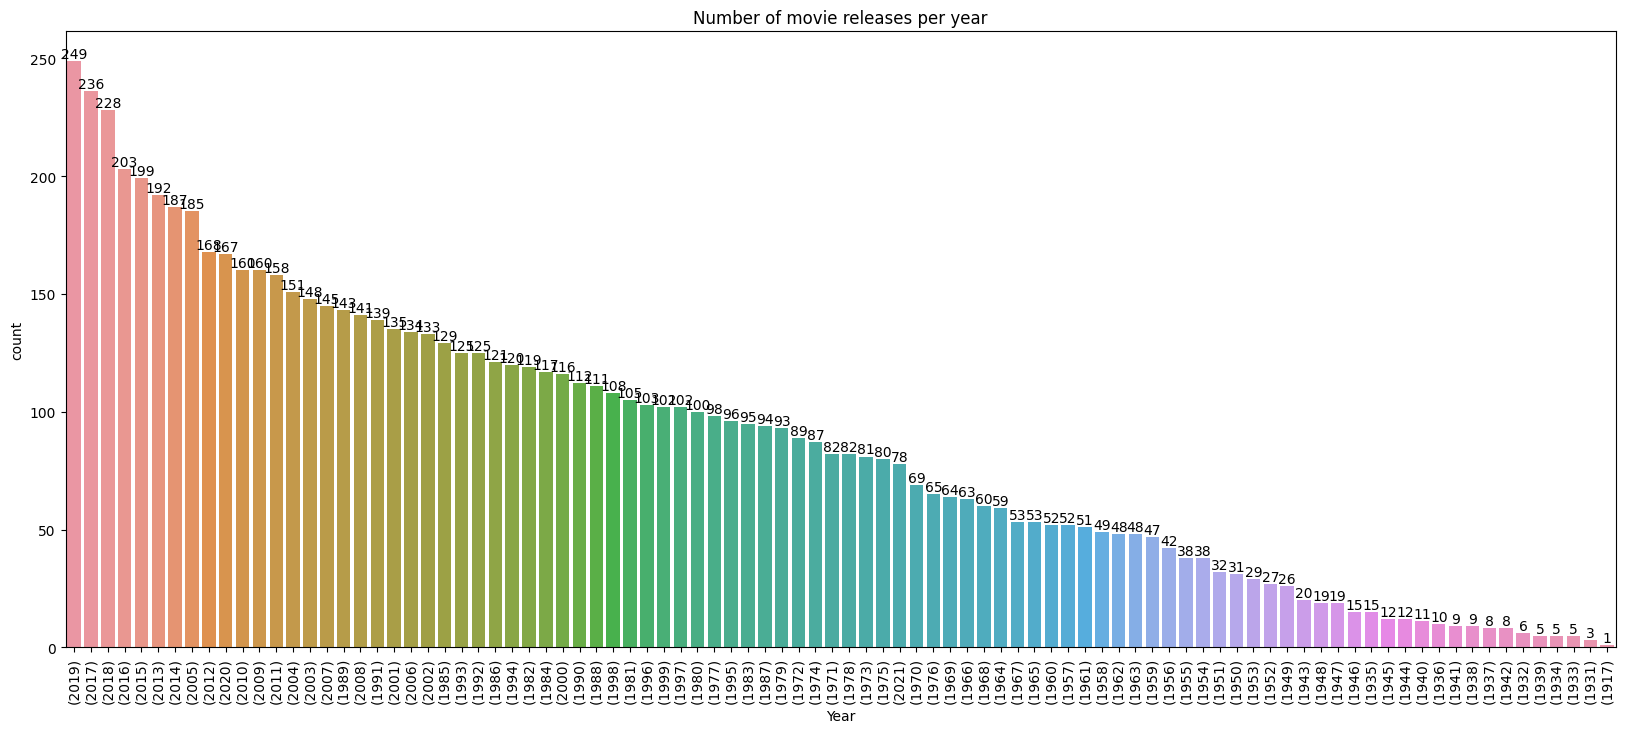

In [22]:
# Number of movie release per year
year_count = fd.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

thamk you